In [22]:
from bankingSystem import * 
from helperFunctions import *
import warnings 
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%pylab inline 
pylab.rcParams['figure.figsize'] = (10, 10)
pylab.rcParams['font.size'] = 20

# start from here
bankFile = "balanceSheetAnalysis/banksData_2022.csv"
params = {"banksFile" : bankFile, # csv file used to initialize the bank agents
                 "leverageRatio": 10.0, # leverage ratio upper bound for all banks
                 "depositReserve": 0.2, # capital reserve as a ratio of deposit
                 "num_borrowing": 5, # number of borrowing request per bank per step
                 "sizeOfBorrowing": 1.0, # size of borrowing as a ratio of equity capital
                 "concentrationParameter": np.load("concentrationParams.npy"), # concentration parameter for the dirichlet distribution
                 "num_banks": 100, # number of banks in the system 
                 "alpha" : 0.5,    # portfolio recovery rate          
                 "beta" : 0.9,     # interbank loan recovery rate
                 "fedRate" : 0.04, # interest rate on borrowing   
                 "portfolioReturnRate" : 0.10, 
                 "returnVolatiliy" : 0.18,
                 "returnCorrelation" : 0.9,
                 "shockSize" : 10,       # size of the shock
                 "shockDuration":[300,300] # time of the shock, [-1,-1] sugguests no shock
                 } 
import copy
params1 = copy.deepcopy(params)
params1["shockDuration"] = [299,300]
params2 = copy.deepcopy(params)
params2["shockDuration"] = [298,300]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


### model without the exogeous shock

In [23]:
numberOfRun = 100
simulationSteps = 500
rCollections = []
for pa in [params, params1, params2]:
    rCollections.append(multiRun(numberOfRun, pa))

100
52


In [ ]:
def amData(rCollection):
    for i,r in enumerate(rCollection):
        if i == 0:
            agentData, modelData = r
        else:
            a, m = r
            agentData += a
            modelData += m

    agentData /= len(rCollection)
    modelData /= len(rCollection)
    return agentData, modelData

In [ ]:
agentDatas = []
modelDatas = [] 
for rCollection in rCollections:
    agentData, modelData = amData(rCollection)
    agentDatas.append(agentData)
    modelDatas.append(modelData)

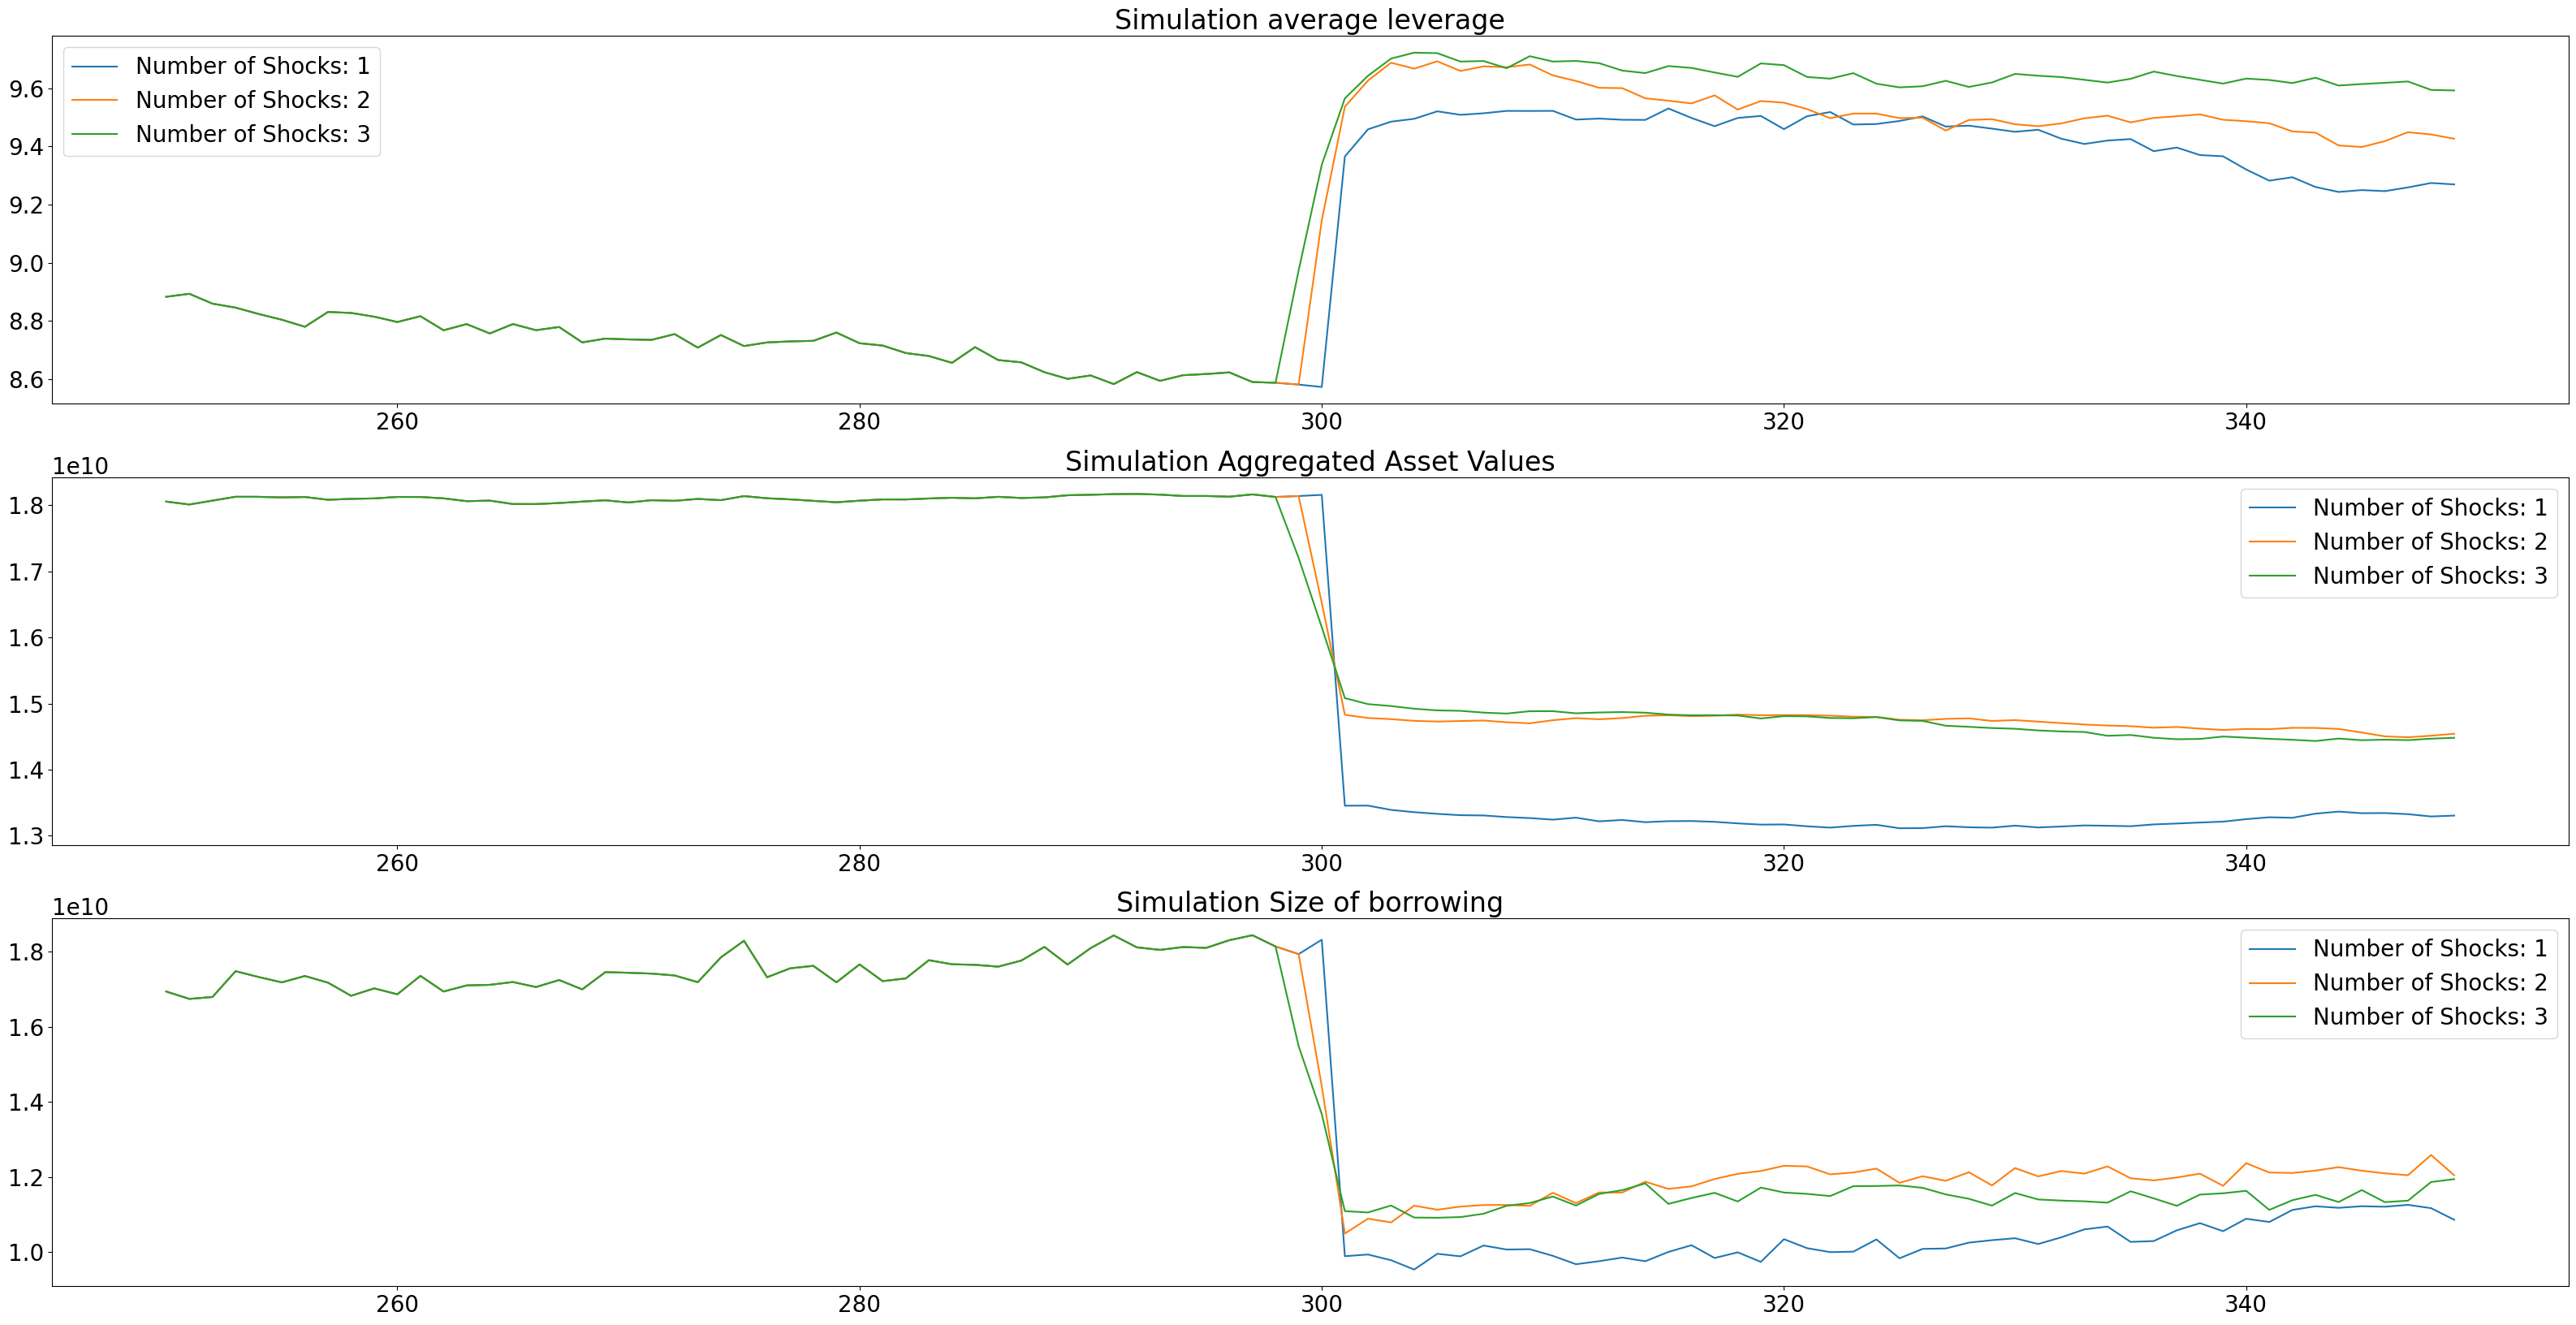

In [ ]:
simulationMonitorCompare(agentDatas, modelDatas, simulationSteps)

In [ ]:
[agentDatas[0].xs(i, level="Step")["Default"].sum() for i in range(simulationSteps)][-1]

22.666666666666668

In [ ]:
[agentDatas[1].xs(i, level="Step")["Default"].sum() for i in range(simulationSteps)][-1]

0.3958333333333333

In [ ]:
[agentDatas[2].xs(i, level="Step")["Default"].sum() for i in range(simulationSteps)][-1]

0.0